In [1]:
import pydelia
import numpy as np
import matplotlib.pyplot as plt

44100


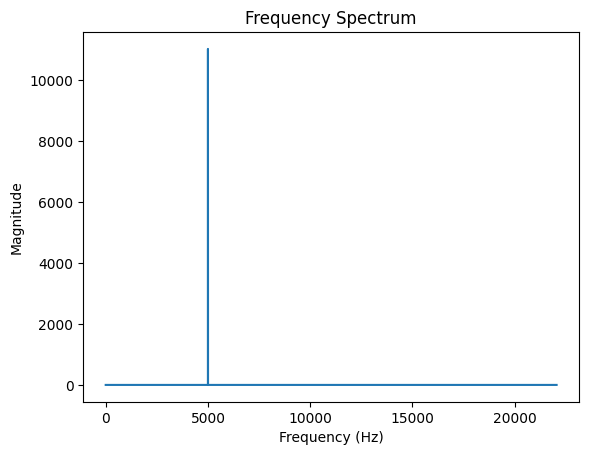

In [7]:
sr = 44100
dur = 1.0

sine = pydelia.sine_wave(freq=5000, amp=0.5, sr=sr, dur=dur)
delia_fft = pydelia.fft(sine)

delia_N = len(delia_fft)
print(delia_N)

bins = pydelia.fft_frequencies(delia_N, sr)
delia_mags = pydelia.magnitude(delia_fft)

plt.plot(bins[:delia_N], delia_mags[:delia_N // 2])  # Plot only the positive frequencies
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


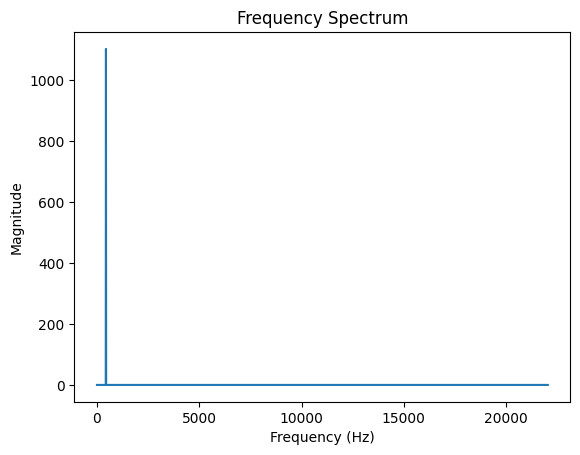

In [74]:
np_fft = np.fft.fft(sine)
N = len(fft_result)

# Sampling rate (samples per second), adjust this according to your actual sampling rate
 # Example: 44.1 kHz|

# Compute the frequency bins
frequencies = np.fft.fftfreq(N, 1 / sr)

# Compute the magnitude (amplitude) of the FFT result
np_mags = np.abs(np_fft)

# Plot the frequency spectrum
plt.plot(frequencies[:N // 2], np_mags[:N // 2])  # Plot only the positive frequencies
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [39]:
np.set_printoptions(threshold=20000)



def format_complex(arr):
    for c in arr:
        print(f".{{ .re = {c.real}, .im = {c.imag}, }},")


format_complex(np_fft[0:4096])

.{ .re = 2.497331334783137e-12, .im = 0.0, },
.{ .re = -1.0541435879029483e-13, .im = -7.634322055786643e-14, },
.{ .re = -1.119243586700236e-13, .im = -1.6110723866091803e-13, },
.{ .re = -1.0577662356985306e-13, .im = -2.30389737368139e-13, },
.{ .re = -1.1694811785645243e-13, .im = -3.0760116676020743e-13, },
.{ .re = -1.0493984028645778e-13, .im = -3.8654871542917374e-13, },
.{ .re = -1.0239610876303733e-13, .im = -4.645286644224708e-13, },
.{ .re = -1.0658875027012718e-13, .im = -5.48205660276103e-13, },
.{ .re = -8.901802307360614e-14, .im = -6.309397448944765e-13, },
.{ .re = -1.0644830830519046e-13, .im = -7.16906934617598e-13, },
.{ .re = -8.797313192978845e-14, .im = -8.373302051722931e-13, },
.{ .re = -1.0524591925415559e-13, .im = -8.956683433872221e-13, },
.{ .re = -1.010159633141576e-13, .im = -9.889317559769958e-13, },
.{ .re = -1.049348735855586e-13, .im = -1.0870899237299574e-12, },
.{ .re = -8.248709004185816e-14, .im = -1.1684903790892722e-12, },
.{ .re = -1.04735398

In [38]:
print(np_fft[0:4096])

[ 2.49733133e-12+0.00000000e+00j -1.05414359e-13-7.63432206e-14j
 -1.11924359e-13-1.61107239e-13j -1.05776624e-13-2.30389737e-13j
 -1.16948118e-13-3.07601167e-13j -1.04939840e-13-3.86548715e-13j
 -1.02396109e-13-4.64528664e-13j -1.06588750e-13-5.48205660e-13j
 -8.90180231e-14-6.30939745e-13j -1.06448308e-13-7.16906935e-13j
 -8.79731319e-14-8.37330205e-13j -1.05245919e-13-8.95668343e-13j
 -1.01015963e-13-9.88931756e-13j -1.04934874e-13-1.08708992e-12j
 -8.24870900e-14-1.16849038e-12j -1.04735399e-13-1.29533236e-12j
 -9.77547076e-14-1.39969265e-12j -1.04425771e-13-1.52649516e-12j
 -9.51957768e-14-1.65795817e-12j -1.05990150e-13-1.78255659e-12j
 -1.28558036e-13-1.91821861e-12j -1.05952121e-13-2.07518595e-12j
 -1.06674076e-13-2.23534385e-12j -1.05696557e-13-2.41581016e-12j
 -1.04318835e-13-2.65450963e-12j -1.05246411e-13-2.81848011e-12j
 -1.08718994e-13-3.02102829e-12j -1.04433752e-13-3.30457386e-12j
 -1.15266233e-13-3.60512835e-12j -1.05301237e-13-3.91195424e-12j
 -6.49619163e-14-4.250782

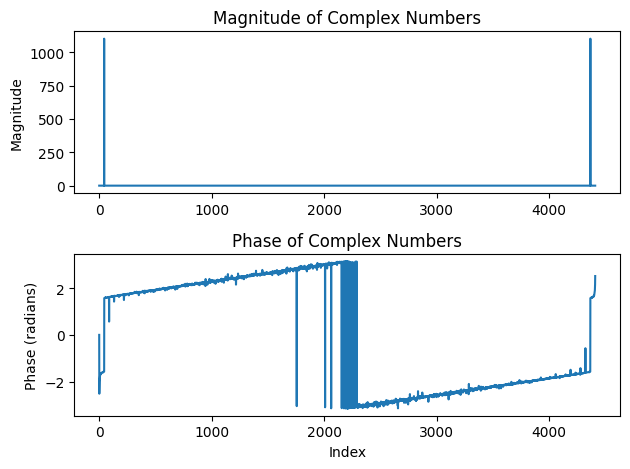

In [28]:

np_phase = np.angle(np_fft)

# Plot the magnitude
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(np_mags)
plt.title('Magnitude of Complex Numbers')
plt.ylabel('Magnitude')

# Plot the phase
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(np_phase)
plt.title('Phase of Complex Numbers')
plt.ylabel('Phase (radians)')
plt.xlabel('Index')

# Display the plots
plt.tight_layout()
plt.show()

In [19]:
len(np_fft)

4410

In [107]:
sine2 = pydelia.sine_wave(freq=400, amp=1.0, sr= 44100, dur=0.5)
sine3 = sine2[0:128]

In [109]:
result = np.fft.fft(sine2)
result2 = np.fft.fft(sine3)

format_complex(result[0:128])
print("------------- NEXT ----------")
format_complex(result2)

.{ .re = 2.9160308408999266e-13, .im = 0.0, },
.{ .re = 2.193413720861698e-13, .im = 4.0986207102520936e-14, },
.{ .re = 1.3706190321068671e-13, .im = 1.0105805081650487e-13, },
.{ .re = 2.261277574654777e-13, .im = 1.1591945628706767e-13, },
.{ .re = 2.520254974106217e-13, .im = 1.8918200339612667e-13, },
.{ .re = 2.2745439150493157e-13, .im = 1.9299986892014183e-13, },
.{ .re = 2.28699934313889e-13, .im = 2.3469039321973826e-13, },
.{ .re = 2.2288064348671397e-13, .im = 2.7583343526443404e-13, },
.{ .re = 2.809295747695069e-13, .im = 2.7674406824138804e-13, },
.{ .re = 2.2162256308275438e-13, .im = 3.5596949621029036e-13, },
.{ .re = 3.0043491898682445e-13, .im = 3.8794213035832503e-13, },
.{ .re = 2.2069983010318122e-13, .im = 4.2869451938845635e-13, },
.{ .re = 2.3027049224940286e-13, .im = 4.667448264116641e-13, },
.{ .re = 2.2099668119294735e-13, .im = 5.042816943475604e-13, },
.{ .re = 1.859163814911704e-13, .im = 4.871598347003079e-13, },
.{ .re = 2.2713662040744215e-13, .im = 

In [94]:
print(sine2)    

[0.0, 0.056959498116995876, 0.11373404759240871, 0.17013930031663263, 0.22599210729407665, 0.28111111333165495, 0.33531734590276424, 0.3884347962746946, 0.44029099101254215, 0.49071755200393774, 0.5395507431861811, 0.5866320022005455, 0.6318084552474611, 0.6749334134708325, 0.7158668492597182, 0.7544758509208142, 0.7906350542454079, 0.824227049569498, 0.855142763005346, 0.8832818106065942, 0.9085528243169685, 0.9308737486442041, 0.9501721070958866, 0.966385237512088, 0.9794604955306666, 0.9893554255245747, 0.9960378984561373, 0.9994862162006879, 0.9996891820008162, 0.9966461368224676, 0.9903669614948382, 0.9808720446271241, 0.9681922164062947, 0.9523686484908525, 0.9334527203256259, 0.9115058523116735, 0.8865993063730003, 0.8588139545676508, 0.828240016494501, 0.7949767663483981, 0.7591322105748438, 0.7208227371708817, 0.68017273777092, 0.6373142037445793, 0.5923862976180485, 0.5455349012105495, 0.49691214195312167, 0.44667589892777904, 0.39498929023093954, 0.3420201433256697, 0.287940